In [1]:
import numpy as np
import pandas as pd
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from math import sqrt

In [8]:
Atssos=pd.read_csv("data/tssosAtime0530.csv",header=None)
Btssos=pd.read_csv("data/tssosBtime0530.csv",header=None)
Acompas=pd.read_csv("data/tssosAtime0521_compas.csv",header=None)
Bcompas=pd.read_csv("data/tssosBtime0521_compas.csv",header=None)
Asdpa=pd.read_csv("data/ncpol2sdpaAtime0520.csv",header=None)
Bsdpa=pd.read_csv("data/ncpol2sdpaBtime0520.csv",header=None)

In [9]:
spar=pd.read_csv("data/sparsity.csv",header=0)
m=[sqrt(spar['col1'][i]) for i in range(len(spar['col1']))]

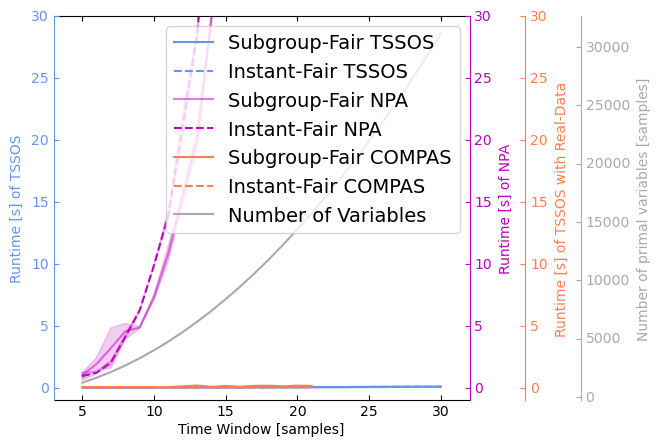

In [21]:
#pdf = PdfPages('cut_figure.pdf') 

fig = plt.figure(1)

plt.style.use('default')

host = HostAxes(fig, [0.15, 0.1, 0.65, 0.8])
par1 = ParasiteAxes(host, sharex=host)
par2 = ParasiteAxes(host, sharex=host)
par3 = ParasiteAxes(host, sharex=host)

host.parasites.append(par1)
host.parasites.append(par2)
host.parasites.append(par3)

host.axis['top'].set_visible(True)
host.axis["right"].set_visible(False)
host.axis["bottom"].set_visible(True)

par1.axis["right"].set_visible(True)
par1.axis["right"].major_ticklabels.set_visible(True)
par1.axis["right"].label.set_visible(True)

offset = (40, 0)
new_axisline = par2._grid_helper.new_fixed_axis
par2.axis["right2"] = new_axisline(loc="right", axes=par2, offset=offset)

offset = (80, 0)
new_axisline = par3._grid_helper.new_fixed_axis
par3.axis["right3"] = new_axisline(loc="right", axes=par3, offset=offset)

fig.add_axes(host)
host.set_xlim(5-2, 30+2)
host.set_ylim(-1, 30)
par1.set_ylim(-1, 30)
par2.set_ylim(-1, 30)
#par3.set_ylim(0, 1)

host.set_xlabel("Time Window [samples]",fontsize=15)
host.set_ylabel("Runtime [s] of TSSOS", fontsize=15)
par1.set_ylabel("Runtime [s] of NPA", fontsize=15)
par2.set_ylabel("Runtime [s] of TSSOS with Real-Data", fontsize=15)
par3.set_ylabel("Number of primal variables [samples]", fontsize=15)

pA, = host.plot(range(5,31),Atssos[0], linestyle='-',label="Subgroup-Fair TSSOS",color="cornflowerblue")
pB, = host.plot(range(5,31),Btssos[0], linestyle='--',label="Instant-Fair TSSOS",color="cornflowerblue")

pAsdpa, = par1.plot(range(5,16),Asdpa[0][0:11], '-',label="Subgroup-Fair NPA",color="m",alpha=0.5)
pBsdpa, = par1.plot(range(5,16),Bsdpa[0][0:11], '--',label="Instant-Fair NPA",color="m")

pAcompas, = par2.plot(range(5,22),Acompas[0], '-',label="Subgroup-Fair COMPAS",color="coral")
pBcompas, = par2.plot(range(5,22),Bcompas[0], '--',label="Instant-Fair COMPAS",color="coral")

#pAreal, = par2.plot(range(5,31),Areal[0], '-',label="Subgroup-Fair Real",color="coral")
#pBreal, = par2.plot(range(5,31),Breal[0], '--',label="Instant-Fair Real",color="coral")

p3, = par3.plot(range(5,31),m,'-', label="Number of Variables",color="darkgrey")

plt.fill_between(range(5,31),Atssos[0]-Atssos[1], Atssos[0]+Atssos[1],color=pA.get_color(), alpha=0.3)
plt.fill_between(range(5,31),Btssos[0]-Btssos[1], Btssos[0]+Btssos[1],color=pB.get_color(), alpha=0.3)

plt.fill_between(range(5,21),Asdpa[0]-Asdpa[1],Asdpa[0]+Asdpa[1],color=pAsdpa.get_color(), alpha=0.2)
plt.fill_between(range(5,21),Bsdpa[0]-Bsdpa[1],Bsdpa[0]+Bsdpa[1],color=pBsdpa.get_color(), alpha=0.2)

host.legend(loc="best",fontsize=14)

hostcolor="cornflowerblue"

host.axis["left"].label.set_color(hostcolor)
par1.axis["right"].label.set_color(pAsdpa.get_color())
par2.axis["right2"].label.set_color(pAcompas.get_color())
#par2.axis["right2"].label.set_color(pAreal.get_color())
par3.axis["right3"].label.set_color(p3.get_color())

host.axis["left"].major_ticks.set_color(hostcolor)
par1.axis['right'].major_ticks.set_color(pAsdpa.get_color())
par2.axis['right2'].major_ticks.set_color(pAcompas.get_color())
#par2.axis['right2'].major_ticks.set_color(pAreal.get_color())
par3.axis['right3'].major_ticks.set_color(p3.get_color())

host.axis["left"].major_ticklabels.set_color(hostcolor)
par1.axis['right'].major_ticklabels.set_color(pAsdpa.get_color())
par2.axis['right2'].major_ticklabels.set_color(pAcompas.get_color())
#par2.axis['right2'].major_ticklabels.set_color(pAreal.get_color())
par3.axis['right3'].major_ticklabels.set_color(p3.get_color())

host.axis["left"].line.set_color(hostcolor)
par1.axis['right'].line.set_color(pAsdpa.get_color())
par2.axis['right2'].line.set_color(pAcompas.get_color())
#par2.axis['right2'].line.set_color(pAreal.get_color())
par3.axis['right3'].line.set_color(p3.get_color())

fig.set_facecolor('white')

# Swtich to Type 42 Fonts.(A.K.A True Type)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

plt.savefig('plots/F3.pdf', bbox_inches='tight') 